In [ ]:
from PIL import Image
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from zipfile import ZipFile
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
with ZipFile("/content/drive/MyDrive/EAFIT/2024-2/Visión por computadora/Ejercicio limones/Lemon_quality.zip", 'r') as zipObj:
   zipObj.extractall("/content/drive/MyDrive/EAFIT/2024-2/Visión por computadora/Ejercicio limones/Lemon_quality")

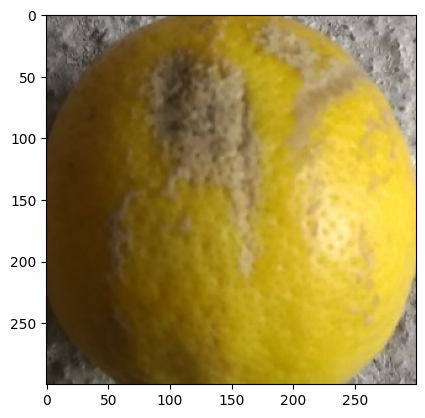

In [ ]:
img=cv2.imread('/content/drive/MyDrive/EAFIT/2024-2/Visión por computadora/Ejercicio limones/Lemon_quality/Lemon_quality/bad_quality/bad_quality_105.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

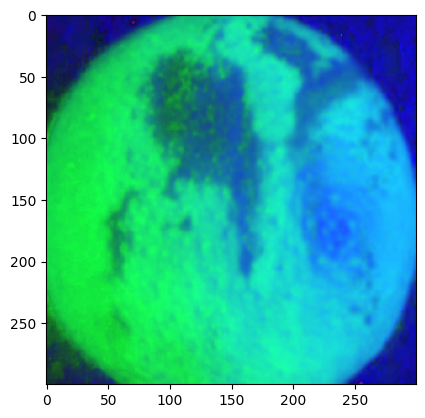

In [ ]:
hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
plt.imshow(hsv_img)

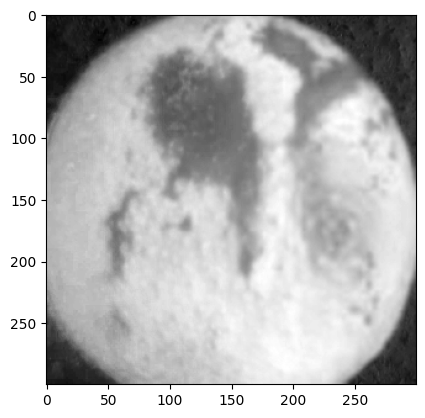

In [ ]:
gray_img = cv2.cvtColor(hsv_img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_img, cmap='gray')

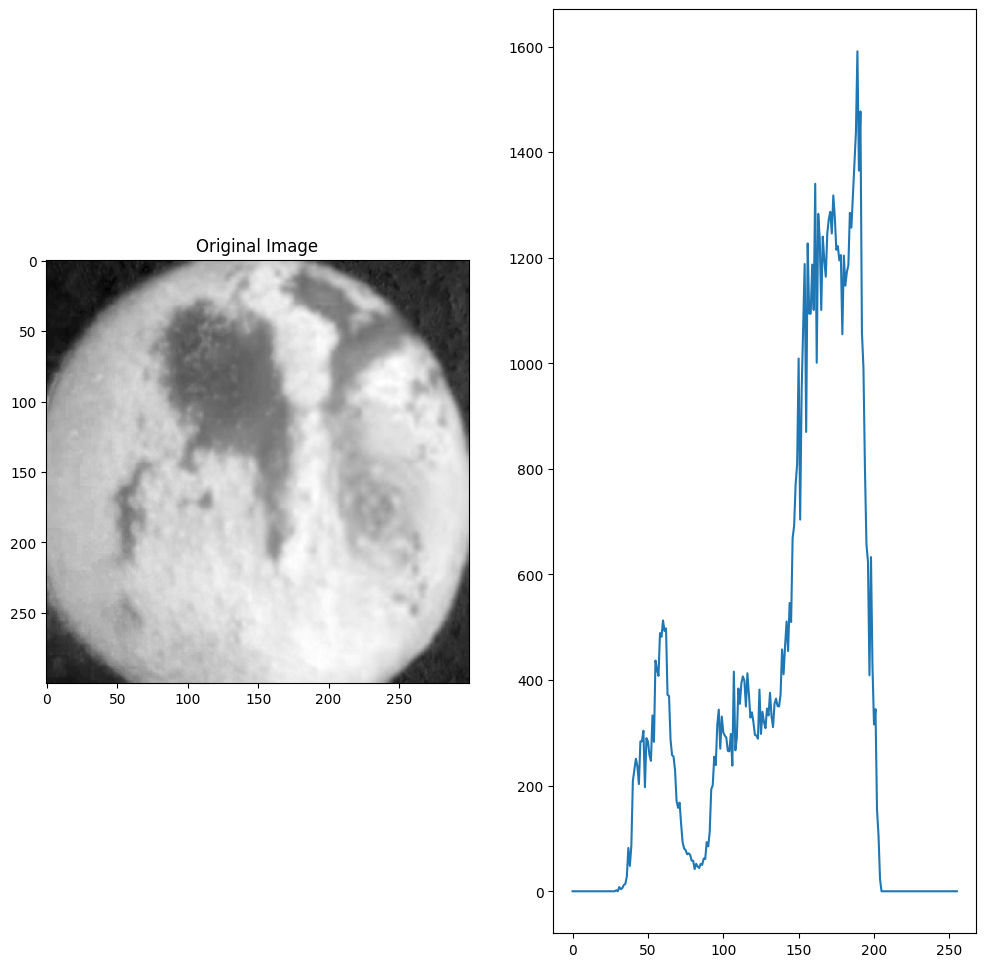

In [ ]:
hist = cv2.calcHist([gray_img], [0], None, [256], [0, 256])
plt.figure(figsize=(12, 12))
plt.subplot(121)
plt.imshow(gray_img, cmap='gray')
plt.title('Original Image')

plt.subplot(122)
plt.plot(hist)

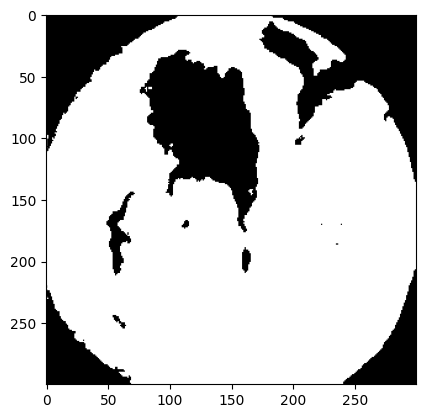

In [ ]:
ret,th = cv2.threshold(gray_img,132,200,cv2.THRESH_BINARY)
plt.imshow(th, cmap='gray')

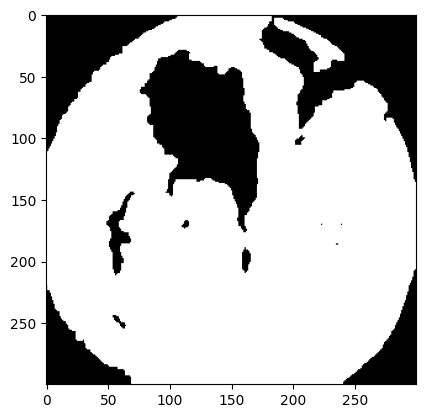

In [ ]:
kernel = np.ones((3, 3),)
fnal= cv2.morphologyEx(th, cv2.MORPH_OPEN, kernel, iterations=2)
plt.imshow(fnal, cmap='gray')

In [ ]:
m = cv2.moments(fnal)
centroid_x = int(m["m10"] / m["m10"])
centroid_y = int(m["m01"] / m["m10"])

hu = cv2.HuMoments(m)

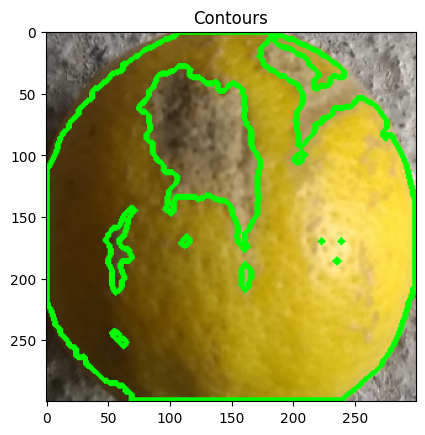

In [ ]:
contours, hierarchy = cv2.findContours(fnal, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contour_img = cv2.drawContours(img.copy(), contours, -1, (0, 255, 0), 3)
plt.imshow(cv2.cvtColor(contour_img, cv2.COLOR_BGR2RGB))
plt.title('Contours')
plt.show()

In [ ]:
perimeter = cv2.arcLength(contours[0], True)
print('Perimeter:', perimeter)
area = cv2.contourArea(contours[0])
print('Area:', area)

Perimeter: 172.85281193256378
Area: 725.0


In [ ]:
folder_path = "/content/drive/MyDrive/EAFIT/2024-2/Visión por computadora/Ejercicio limones/Lemon_quality/Lemon_quality"

In [ ]:
def get_countour_area(gray_img):
    ret,th = cv2.threshold(gray_img,100,200,cv2.THRESH_BINARY)
    kernel = np.ones((3, 3),)
    fnal= cv2.morphologyEx(th, cv2.MORPH_OPEN, kernel, iterations=2)
    contours, hierarchy = cv2.findContours(fnal, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    perimeter = cv2.arcLength(contours[0], True)
    area = cv2.contourArea(contours[0])
    return perimeter,area

In [ ]:
def readImg(img):
    img = cv2.imread(img)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    hsv_img= cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    gray_img = cv2.cvtColor(hsv_img, cv2.COLOR_BGR2GRAY)
    return img, gray_img

In [ ]:
import os

image_dir = '/content/drive/MyDrive/EAFIT/2024-2/Visión por computadora/Ejercicio limones/Lemon_quality/Lemon_quality/bad_quality/'


data = []

for filename in os.listdir(image_dir):
    if filename.endswith('.jpg'):
        img_path = os.path.join(image_dir, filename)
        img, gray_img = readImg(img_path)
        perimeter, area = get_countour_area(gray_img)
        quality = 'bad'
        data.append({'Perimeter': perimeter, 'Area': area, 'Quality': quality})

df_1 = pd.DataFrame(data)
print(df_1)

       Perimeter     Area Quality
0      20.000000     16.0     bad
1      19.414214     24.5     bad
2      70.727922    163.5     bad
3     965.595014  59230.5     bad
4     996.607206  60949.0     bad
..           ...      ...     ...
946    26.242641     42.5     bad
947    12.000000      8.0     bad
948  1086.742202  80503.5     bad
949    25.414214     28.5     bad
950    26.242641     41.5     bad

[951 rows x 3 columns]


In [ ]:
image_dir = '/content/drive/MyDrive/EAFIT/2024-2/Visión por computadora/Ejercicio limones/Lemon_quality/Lemon_quality/good_quality/'


data = []

for filename in os.listdir(image_dir):
    if filename.endswith('.jpg'):
        img_path = os.path.join(image_dir, filename)
        img, gray_img = readImg(img_path)
        perimeter, area = get_countour_area(gray_img)
        quality = 'good'
        data.append({'Perimeter': perimeter, 'Area': area, 'Quality': quality})


df_2 = pd.DataFrame(data)
print(df_2)

       Perimeter     Area Quality
0     537.487368  19786.5    good
1     875.269113  47838.0    good
2     665.227484  29774.5    good
3     736.139171  37534.5    good
4     677.570629  29307.5    good
...          ...      ...     ...
1120  889.979789  52099.0    good
1121  880.666082  52780.0    good
1122   22.828427     32.0    good
1123  688.683327  30294.5    good
1124  814.867094  44831.0    good

[1125 rows x 3 columns]


In [ ]:
df_tot = pd.concat([df_1, df_2], ignore_index=True)
df_tot

,Perimeter,Area,Quality
0,20.000000,16.0,bad
1,19.414214,24.5,bad
2,70.727922,163.5,bad
3,965.595014,59230.5,bad
4,996.607206,60949.0,bad
...,...,...,...
2071,889.979789,52099.0,good
2072,880.666082,52780.0,good
2073,22.828427,32.0,good
2074,688.683327,30294.5,good


In [ ]:
x = df_tot.drop(columns = ["Quality"])
y = df_tot["Quality"]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(
x, y, test_size = 0.2, random_state = 21)

In [ ]:
# Definir el modelo
dt_model = DecisionTreeClassifier()

# Definir los hiperparámetros a optimizar
param_grid = {
    'max_depth': [None, 3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Configurar GridSearchCV
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(x_train, y_train)

# Obtener el mejor modelo y sus hiperparámetros
best_model = grid_search.best_estimator_
print("Mejores hiperparámetros encontrados:", grid_search.best_params_)

# Predecir y evaluar con el mejor modelo
y_pred = best_model.predict(x_test)
print("Accuracy con el mejor modelo de Decision Tree:", accuracy_score(y_test, y_pred))

Mejores hiperparámetros encontrados: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 5}
Accuracy con el mejor modelo de Decision Tree: 0.8701923076923077


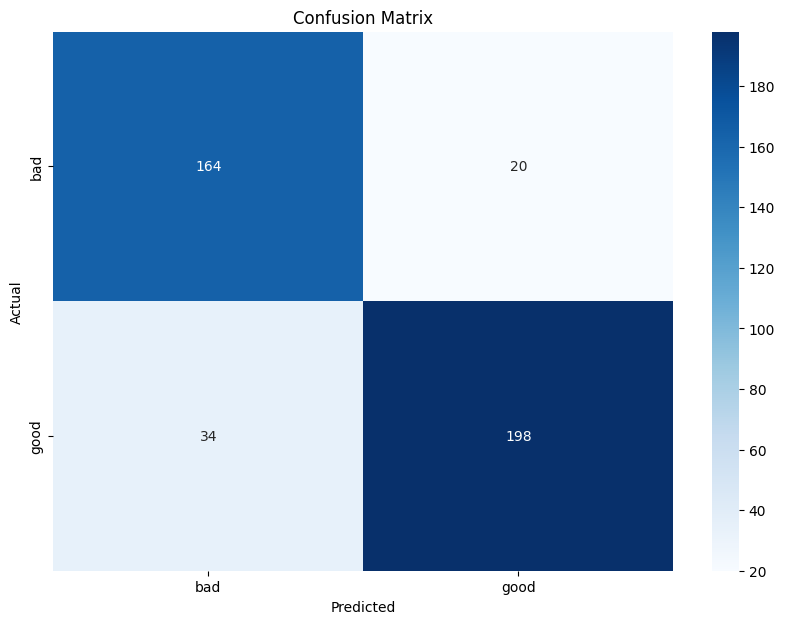

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['bad', 'good'], yticklabels=['bad', 'good'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Definir el modelo
gb_model = GradientBoostingClassifier(random_state=42)

# Definir los hiperparámetros a optimizar
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [2, 3, 4]
}

# Configurar GridSearchCV
grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, Y_train)

# Obtener el mejor modelo y sus hiperparámetros
best_model = grid_search.best_estimator_
print("Mejores hiperparámetros encontrados:", grid_search.best_params_)

# Predecir y evaluar con el mejor modelo
y_pred = best_model.predict(X_test)
print("Accuracy con el mejor modelo de Gradient Boosting:", accuracy_score(Y_test, y_pred))

Mejores hiperparámetros encontrados: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 50}
Accuracy con el mejor modelo de Gradient Boosting: 0.8317307692307693


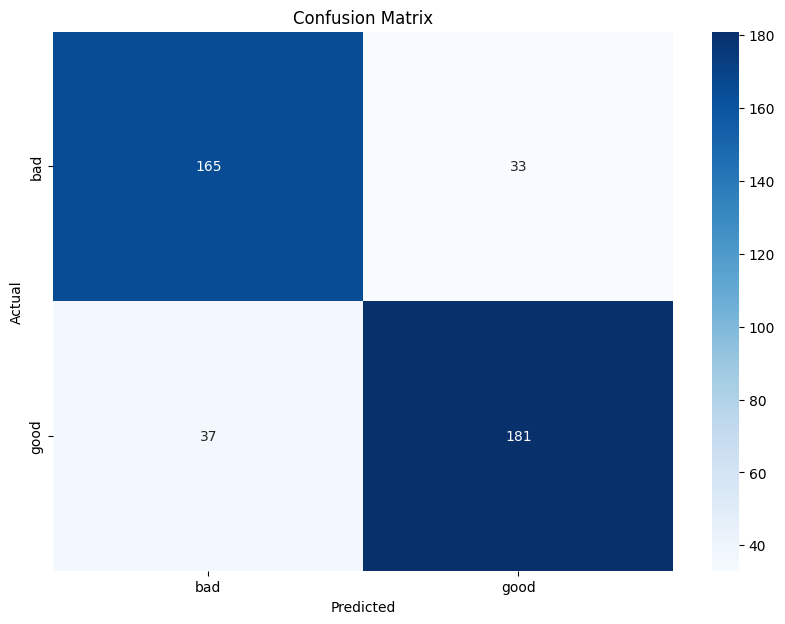

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(Y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['bad', 'good'], yticklabels=['bad', 'good'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()